In [6]:
import pandas as pd

# Replace 'data.csv' with your file path
df = pd.read_csv('DS 325 Final Project.csv')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  \
0       2005-01-01    2.37    2.68  2.86  3.22  3.39  3.71  3.97   4.22   
1       2005-02-01    2.58    2.85  3.03  3.38  3.54  3.77  3.97   4.17   
2       2005-03-01    2.80    3.09  3.30  3.73  3.91  4.17  4.33   4.50   
3       2005-04-01    2.84    3.14  3.32  3.65  3.79  4.00  4.16   4.34   
4       2005-05-01    2.90    3.17  3.33  3.64  3.72  3.85  3.94   4.14   

   DGS20  DGS30  
0   4.77   4.77  
1   4.61   4.56  
2   4.89   4.77  
3   4.75   4.65  
4   4.56   4.49  


In [9]:
import pandas as pd

# Replace 'data.csv' with your file path
df = pd.read_csv('USREC.csv')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  USREC
0       2005-01-01      0
1       2005-02-01      0
2       2005-03-01      0
3       2005-04-01      0
4       2005-05-01      0


In [11]:
import pandas as pd


baa = pd.read_csv('DBAA.csv', parse_dates=['observation_date'])
aaa = pd.read_csv('DAAA.csv', parse_dates=['observation_date'])


baa = baa.rename(columns={'DBAA': 'yield_baa'})
aaa = aaa.rename(columns={'DAAA': 'yield_aaa'})


df = pd.merge(baa, aaa, on='observation_date', how='inner')


df['risk_premium'] = df['yield_baa'] - df['yield_aaa']


df['year'] = df['observation_date'].dt.year
annual_prem = df.groupby('year')['risk_premium'].mean().reset_index()

print(df.head())        # monthly spread
print(annual_prem)      # yearly average spread


  observation_date  yield_baa  yield_aaa  risk_premium  year
0       2005-01-01       6.02       5.36          0.66  2005
1       2005-02-01       5.82       5.20          0.62  2005
2       2005-03-01       6.06       5.40          0.66  2005
3       2005-04-01       6.05       5.33          0.72  2005
4       2005-05-01       6.01       5.15          0.86  2005
    year  risk_premium
0   2005      0.829167
1   2006      0.891667
2   2007      0.926667
3   2008      1.815000
4   2009      1.982500
5   2010      1.095000
6   2011      1.025000
7   2012      1.261667
8   2013      0.866667
9   2014      0.691667
10  2015      1.112500
11  2016      1.051667
12  2017      0.696667
13  2018      0.870000
14  2019      0.988333
15  2020      1.125833
16  2021      0.690000
17  2022      0.998333
18  2023      1.050833
19  2024      0.709167
20  2025      0.620000


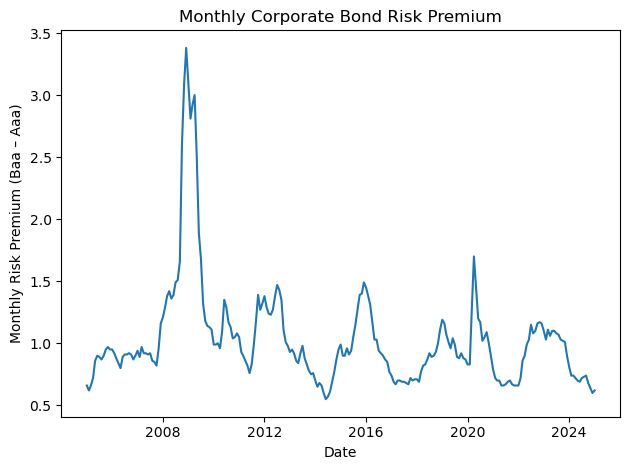

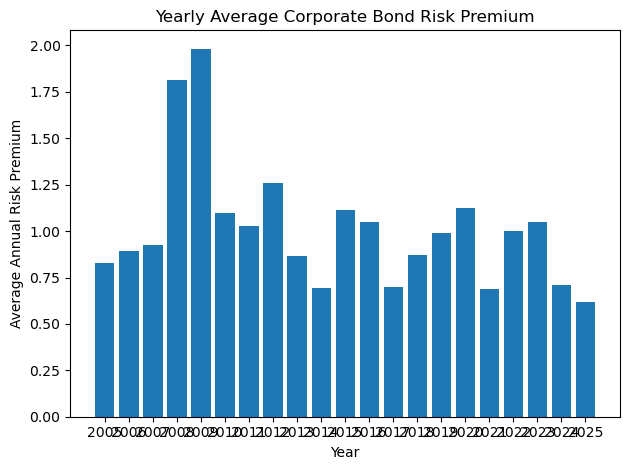

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.plot(df['observation_date'], df['risk_premium'])
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Risk Premium (Baa – Aaa)')
ax.set_title('Monthly Corporate Bond Risk Premium')
plt.tight_layout()

# 2) Annual Average Risk Premium
fig, ax = plt.subplots()
ax.bar(annual_prem['year'].astype(str), annual_prem['risk_premium'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')
plt.tight_layout()

plt.show()


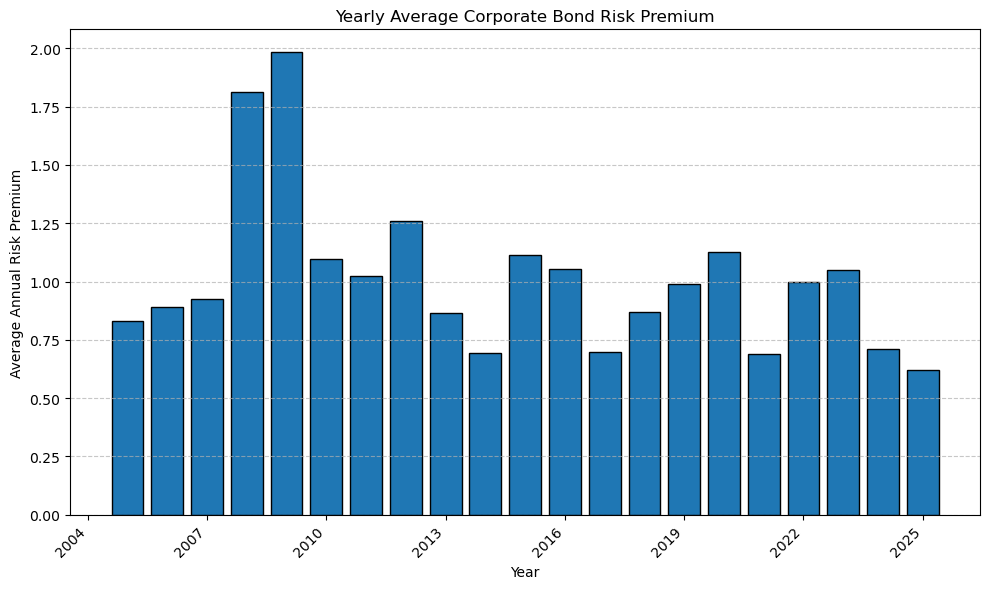

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = annual_prem['year']
premiums = annual_prem['risk_premium']

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
ax.bar(years, premiums, edgecolor='black')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')

# Force integer ticks and reduce the number of ticks
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

# Rotate tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
